<a href="https://colab.research.google.com/github/manasa1311/abc/blob/main/experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
data = pd.read_csv('/content/store_data.csv',header=None)
print("Shape of the dataset:",data.shape)
print("First few rows of the dataset:")
print(data.head)

Shape of the dataset: (7501, 20)
First few rows of the dataset:
<bound method NDFrame.head of                  0                  1            2   ...               17       18         19
0            shrimp            almonds      avocado  ...  frozen smoothie  spinach  olive oil
1           burgers          meatballs         eggs  ...              NaN      NaN        NaN
2           chutney                NaN          NaN  ...              NaN      NaN        NaN
3            turkey            avocado          NaN  ...              NaN      NaN        NaN
4     mineral water               milk   energy bar  ...              NaN      NaN        NaN
...             ...                ...          ...  ...              ...      ...        ...
7496         butter         light mayo  fresh bread  ...              NaN      NaN        NaN
7497        burgers  frozen vegetables         eggs  ...              NaN      NaN        NaN
7498        chicken                NaN          NaN  ...    

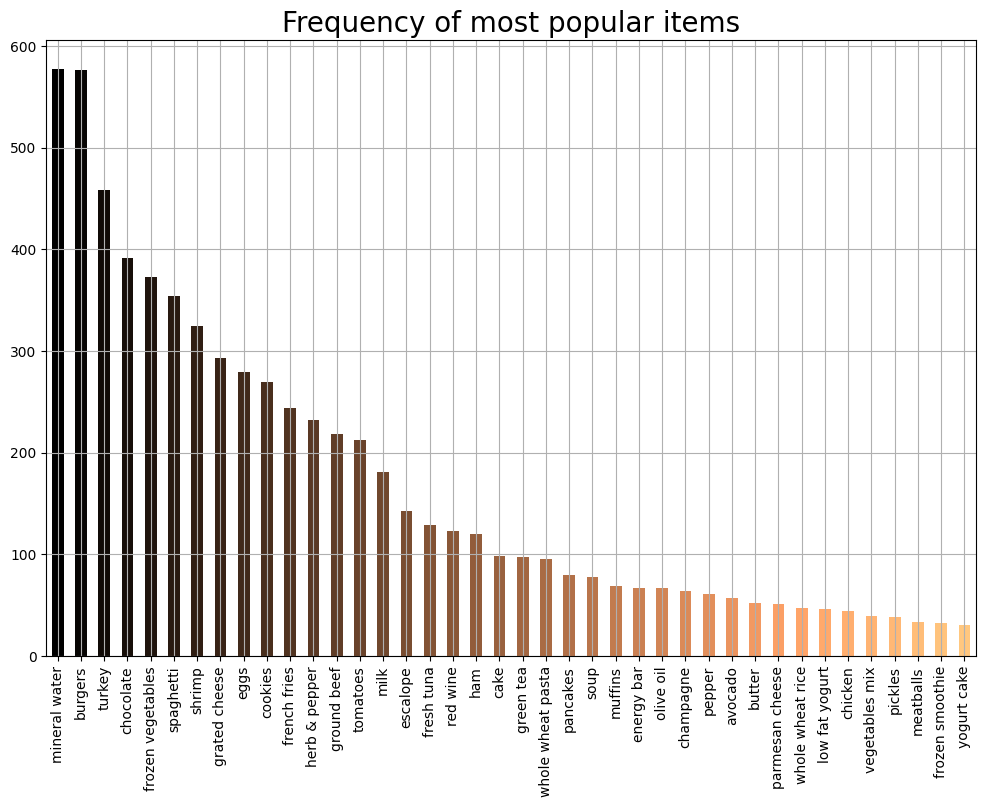

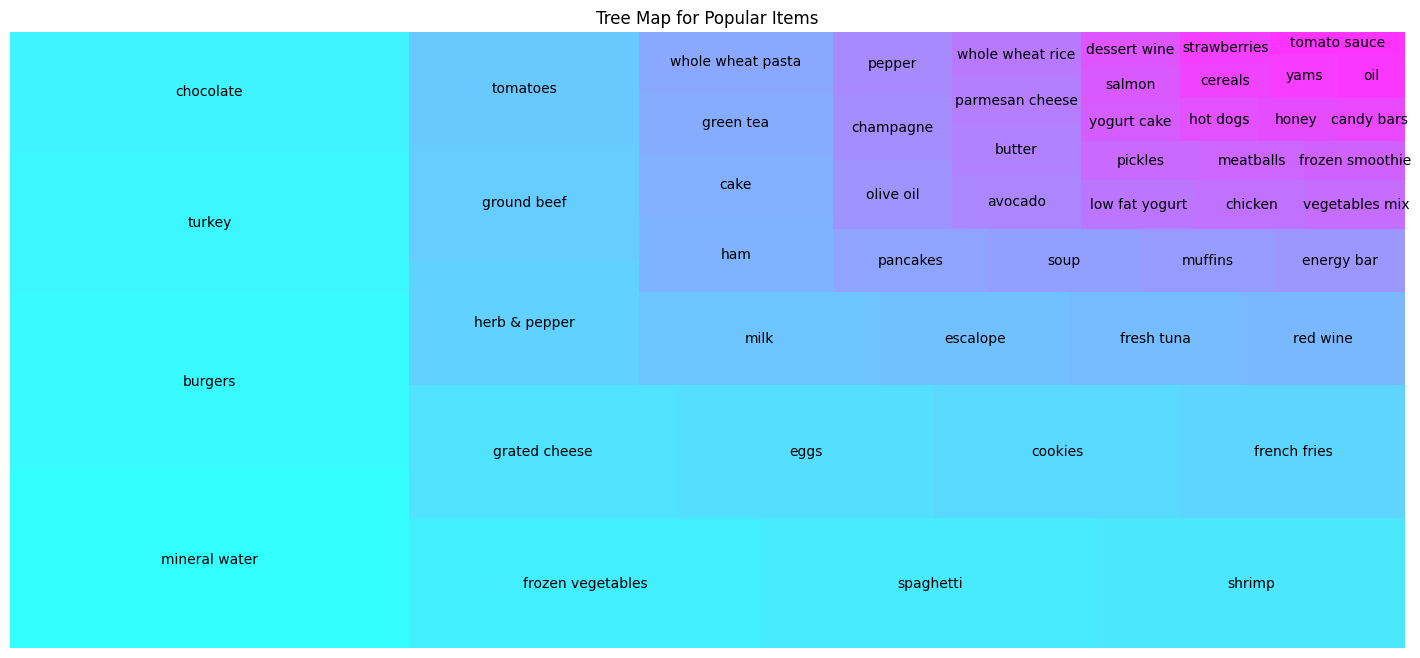

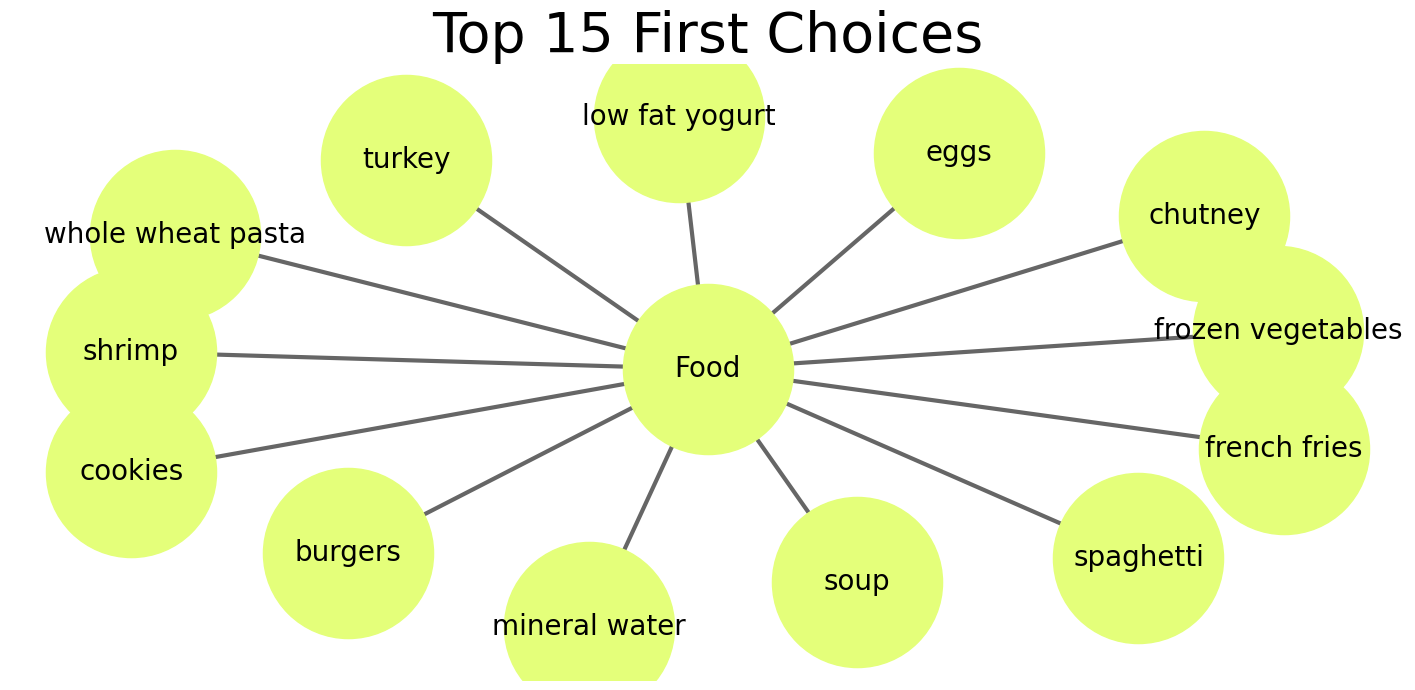

Frequent Itemsets with at least 5% support:
    support                                          itemsets
0  0.267964  (<generator object <genexpr> at 0x7d044abfc6d0>)
1  0.732036  (<generator object <genexpr> at 0x7d044ae5b990>)


In [4]:
plt.rcParams['figure.figsize']=(12,8)
color=plt.cm.copper(np.linspace(0,1,40))
data[0].value_counts().head(40).plot.bar(color=color)
plt.title('Frequency of most popular items',fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()
y = data[0].value_counts().head(50).to_frame()
y.index
plt.rcParams['figure.figsize']=(18,8)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()
data['food']='Food'
food=data.truncate(before=-1,after=15)
import networkx as nx
food=nx.from_pandas_edgelist(food,source='food',target=0,edge_attr=True)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,8)
pos=nx.spring_layout(food)
color=plt.cm.Wistia(np.linspace(0,15,1))
nx.draw_networkx_nodes(food,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(food,pos,width=3,alpha=0.6,edge_color='black')
nx.draw_networkx_labels(food,pos,font_size=20,font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices',fontsize=40)
plt.show()
transactions=[]
for i in range(len(data)):
  transactions.append([str(data.values[i,j]for j in range(len(data.columns)))])
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary,columns=te.columns_)
frequent_itemsets=apriori(df,min_support=0.05,use_colnames=True)
print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)